In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width: 98% !important }</style>'))

In [2]:
from utilities import *

In [3]:
import joblib
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
scanners.remove('D2B6503554D7')

In [5]:
ble = read_ble('../Data/ble.csv')

In [6]:
rssi = pd.read_csv('../Data/sequenceRssi4.csv')

In [7]:
rssi = rssi.pivot_table(columns="scanner", values="rssi", index="time")
rssi.rename_axis(None, axis=1, inplace=True)
rssi.index = pd.to_datetime(rssi.index)

In [8]:
rssi = rssi.groupby(pd.Grouper(freq='100ms')).mean()
rssi

C400A2E19293  CD4533FFC0E1  DB8B36A69C56  \
time                                                                
2020-01-08 00:57:23.700           NaN         -75.5         -90.0   
2020-01-08 00:57:23.800           NaN           NaN           NaN   
2020-01-08 00:57:23.900           NaN           NaN           NaN   
2020-01-08 00:57:24.000           NaN           NaN           NaN   
2020-01-08 00:57:24.100           NaN         -71.0           NaN   
...                               ...           ...           ...   
2020-01-08 01:04:09.300           NaN           NaN           NaN   
2020-01-08 01:04:09.400           NaN         -75.0           NaN   
2020-01-08 01:04:09.500           NaN           NaN           NaN   
2020-01-08 01:04:09.600           NaN           NaN           NaN   
2020-01-08 01:04:09.700           NaN           NaN           NaN   

                         DD697EA75B68  DF231643E227  E13B805C6CB0  \
time                                                                
2020-01-08 00:57:23.700           NaN           NaN         -75.0   
2020-01-08 00:57:23.800           NaN         -69.5           NaN   
2020-01-08 00:57:23.900           NaN           NaN           NaN   
2020-01-08 00:57:24.000           NaN         -62.0           NaN   
2020-01-08 00:57:24.100           NaN           NaN           NaN   
...                               ...           ...           ...   
2020-01-08 01:04:09.300           NaN           NaN           NaN   
2020-01-08 01:04:09.400           NaN           NaN           NaN   
2020-01-08 01:04:09.500           NaN         -72.0           NaN   
2020-01-08 01:04:09.600           NaN           NaN           NaN   
2020-01-08 01:04:09.700           NaN           NaN           NaN   

                         E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  \
time                                                                
2020-01-08 00:57:23.700           NaN           NaN           NaN   
2020-01-08 00:57:23.800           NaN         -74.0           NaN   
2020-01-08 00:57:23.900           NaN           NaN           NaN   
2020-01-08 00:57:24.000           NaN           NaN           NaN   
2020-01-08 00:57:24.100           NaN         -73.0           NaN   
...                               ...           ...           ...   
2020-01-08 01:04:09.300           NaN         -68.0         -93.0   
2020-01-08 01:04:09.400           NaN           NaN           NaN   
2020-01-08 01:04:09.500           NaN         -75.0           NaN   
2020-01-08 01:04:09.600           NaN           NaN         -94.0   
2020-01-08 01:04:09.700           NaN         -70.0           NaN   

                         E96AF2C858BA  EC72840D9AD3  F1307ECB3B90  \
time                                                                
2020-01-08 00:57:23.700           NaN           NaN           NaN   
2020-01-08 00:57:23.800           NaN           NaN           NaN   
2020-01-08 00:57:23.900           NaN           NaN           NaN   
2020-01-08 00:57:24.000           NaN           NaN           NaN   
2020-01-08 00:57:24.100           NaN           NaN           NaN   
...                               ...           ...           ...   
2020-01-08 01:04:09.300           NaN           NaN           NaN   
2020-01-08 01:04:09.400         -67.0           NaN           NaN   
2020-01-08 01:04:09.500           NaN         -72.0           NaN   
2020-01-08 01:04:09.600           NaN           NaN           NaN   
2020-01-08 01:04:09.700           NaN           NaN           NaN   

                         F1EDAF28E08A  F69A86823B96  FB2EE01C18CE  \
time                                                                
2020-01-08 00:57:23.700           NaN           NaN           NaN   
2020-01-08 00:57:23.800           NaN           NaN           NaN   
2020-01-08 00:57:23.900           NaN         -89.0           NaN   
2020-01-08 00:57:24.000           NaN         -77.0         -87.0   
2020-01-08 00:57:24

In [9]:
loc = pd.read_csv('../Data/sequenceLoc4.csv')
loc['time'] = pd.to_datetime(loc['time'])
loc.set_index('time', inplace=True)

In [10]:
loc.shape

(3176, 3)

In [11]:
loc = loc.groupby(pd.Grouper(freq='100ms')).mean()
loc

X         Y
time                                       
2020-01-08 00:57:20.700  0.805347  3.231092
2020-01-08 00:57:20.800       NaN       NaN
2020-01-08 00:57:20.900  0.771981  3.233802
2020-01-08 00:57:21.000       NaN       NaN
2020-01-08 00:57:21.100  0.772330  3.232481
...                           ...       ...
2020-01-08 01:04:10.900  0.482111  2.822062
2020-01-08 01:04:11.000  0.560385  2.832394
2020-01-08 01:04:11.100  0.675054  2.835502
2020-01-08 01:04:11.200       NaN       NaN
2020-01-08 01:04:11.300  0.739653  2.855602

[4107 rows x 2 columns]

In [12]:
loc.isna().sum()

X    1862
Y    1862
dtype: int64

In [13]:
def transform(loc, inplace=False):
    if inplace:
        loc['X'] = 24.187023 + loc['X']
        loc['Y'] = 12.252072 - loc['Y']
    else:
        transformed = pd.DataFrame()
        transformed['X'] = 24.187023 + loc['X']
        transformed['Y'] = 12.252072 - loc['Y']
        return transformed
    
def scale(loc, inplace=False):
    if inplace:
        loc['X'] = loc['X'] / 33.5
        loc['Y'] = loc['Y'] / 16.8
    else:
        scaled = pd.DataFrame()
        scaled['X'] = loc['X'] / 33.5
        scaled['Y'] = loc['Y'] / 16.8
        return scaled
    
def inv_scale(loc, inplace=False):
    if inplace:
        loc['X'] = loc['X'] * 33.5
        loc['Y'] = loc['Y'] * 16.8
    else:
        scaled = pd.DataFrame()
        scaled['X'] = loc['X'] * 33.5
        scaled['Y'] = loc['Y'] * 16.8
        return scaled

In [14]:
transform(loc, inplace=True)
scale(loc, inplace=True)
loc

X         Y
time                                       
2020-01-08 00:57:20.700  0.746041  0.536963
2020-01-08 00:57:20.800       NaN       NaN
2020-01-08 00:57:20.900  0.745045  0.536802
2020-01-08 00:57:21.000       NaN       NaN
2020-01-08 00:57:21.100  0.745055  0.536880
...                           ...       ...
2020-01-08 01:04:10.900  0.736392  0.561310
2020-01-08 01:04:11.000  0.738729  0.560695
2020-01-08 01:04:11.100  0.742152  0.560510
2020-01-08 01:04:11.200       NaN       NaN
2020-01-08 01:04:11.300  0.744080  0.559314

[4107 rows x 2 columns]

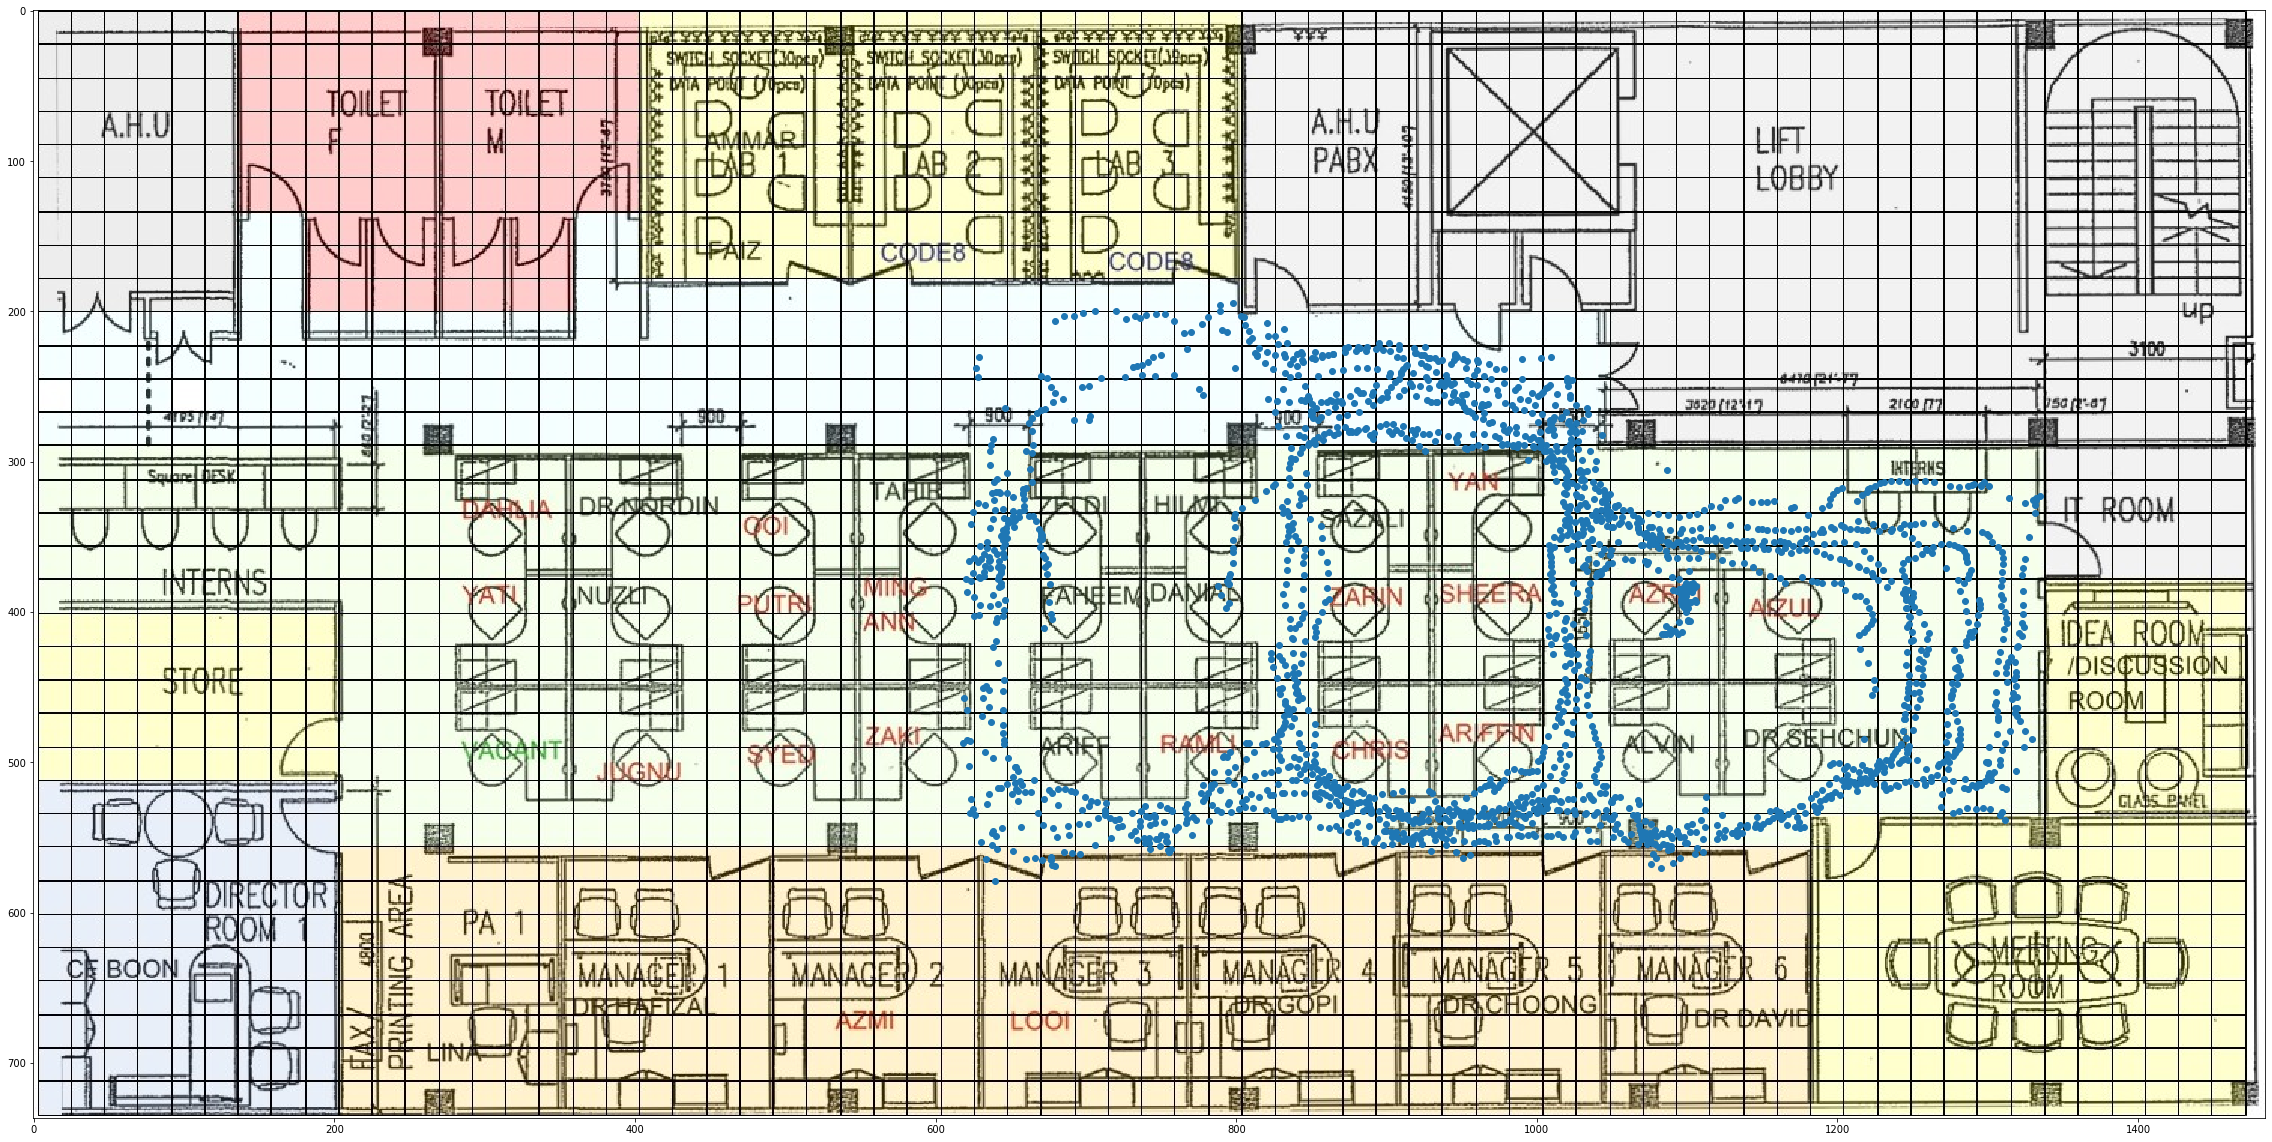

In [15]:
img =  mpimg.imread('../Map/main.png')

ori_loc = inv_scale(loc)
plt.figure(figsize=(40,40))
plt.imshow(img)
plt.scatter(ori_loc['X'] * 44, ori_loc['Y'] * 44)
plt.show()

In [16]:
data = rssi.join(loc, how='inner')
data.shape

(4061, 18)

In [17]:
data.isna().sum()

C400A2E19293    3670
CD4533FFC0E1    3603
DB8B36A69C56    3603
DD697EA75B68    3611
DF231643E227    3493
E13B805C6CB0    3416
E43355CA8B96    3587
E6D9D20DD197    3138
E8FD0B453DC4    3783
E96AF2C858BA    3325
EC72840D9AD3    3635
F1307ECB3B90    3461
F1EDAF28E08A    3695
F69A86823B96    3599
FB2EE01C18CE    3521
FDAE5980F28C    3690
X               1852
Y               1852
dtype: int64

In [18]:
data.dropna(subset=['X', 'Y'], inplace=True)

In [19]:
data.describe()

C400A2E19293  CD4533FFC0E1  DB8B36A69C56  DD697EA75B68  DF231643E227  \
count    182.000000    258.000000    219.000000    224.000000    308.000000   
mean     -80.887363    -72.918282    -79.678082    -72.839286    -69.109307   
std        7.496018      7.300164      6.847974      8.807792      7.628508   
min      -96.000000    -94.000000    -94.000000    -95.000000    -91.000000   
25%      -86.375000    -77.000000    -84.500000    -78.250000    -73.000000   
50%      -82.000000    -73.000000    -80.000000    -72.000000    -68.000000   
75%      -76.000000    -68.000000    -75.000000    -66.000000    -64.000000   
max      -64.000000    -50.000000    -61.000000    -51.000000    -51.000000   

       E13B805C6CB0  E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  E96AF2C858BA  \
count    350.000000    223.000000    546.000000    135.000000    444.000000   
mean     -71.926190    -84.367713    -77.120116    -88.423457    -73.869932   
std        7.978633      6.462416      8.440955      5.953376      8.983731   
min      -95.000000    -96.000000    -98.000000    -98.000000    -96.000000   
25%      -77.000000    -89.000000    -84.000000    -93.000000    -81.000000   
50%      -71.666667    -85.000000    -77.000000    -89.000000    -73.000000   
75%      -67.000000    -80.000000    -71.000000    -85.250000    -67.000000   
max      -48.000000    -68.000000    -53.000000    -73.000000    -53.000000   

       EC72840D9AD3  F1307ECB3B90  F1EDAF28E08A  F69A86823B96  FB2EE01C18CE  \
count    235.000000    307.000000    175.000000    255.000000    326.000000   
mean     -74.277305    -72.714441    -88.542857    -74.926471    -81.814928   
std        8.498900      8.274908      4.800214      8.413704      7.143547   
min      -94.000000    -96.000000    -97.000000    -95.000000    -96.000000   
25%      -80.000000    -79.000000    -92.500000    -80.000000    -87.000000   
50%      -75.000000    -72.000000    -89.000000    -75.000000    -82.000000   
75%      -69.500000    -67.000000    -85.000000    -70.000000    -75.125000   
max      -53.000000    -54.000000    -73.000000    -52.000000    -64.000000   

       FDAE5980F28C            X            Y  
count     169.00000  2209.000000  2209.000000  
mean      -82.06213     0.667409     0.552778  
std         7.89914     0.129528     0.145477  
min       -98.00000     0.419386     0.263352  
25%       -88.00000     0.573078     0.440277  
50%       -82.00000     0.677521     0.534798  
75%       -76.00000     0.753672     0.702311  
max       -67.00000     0.905456     0.782903

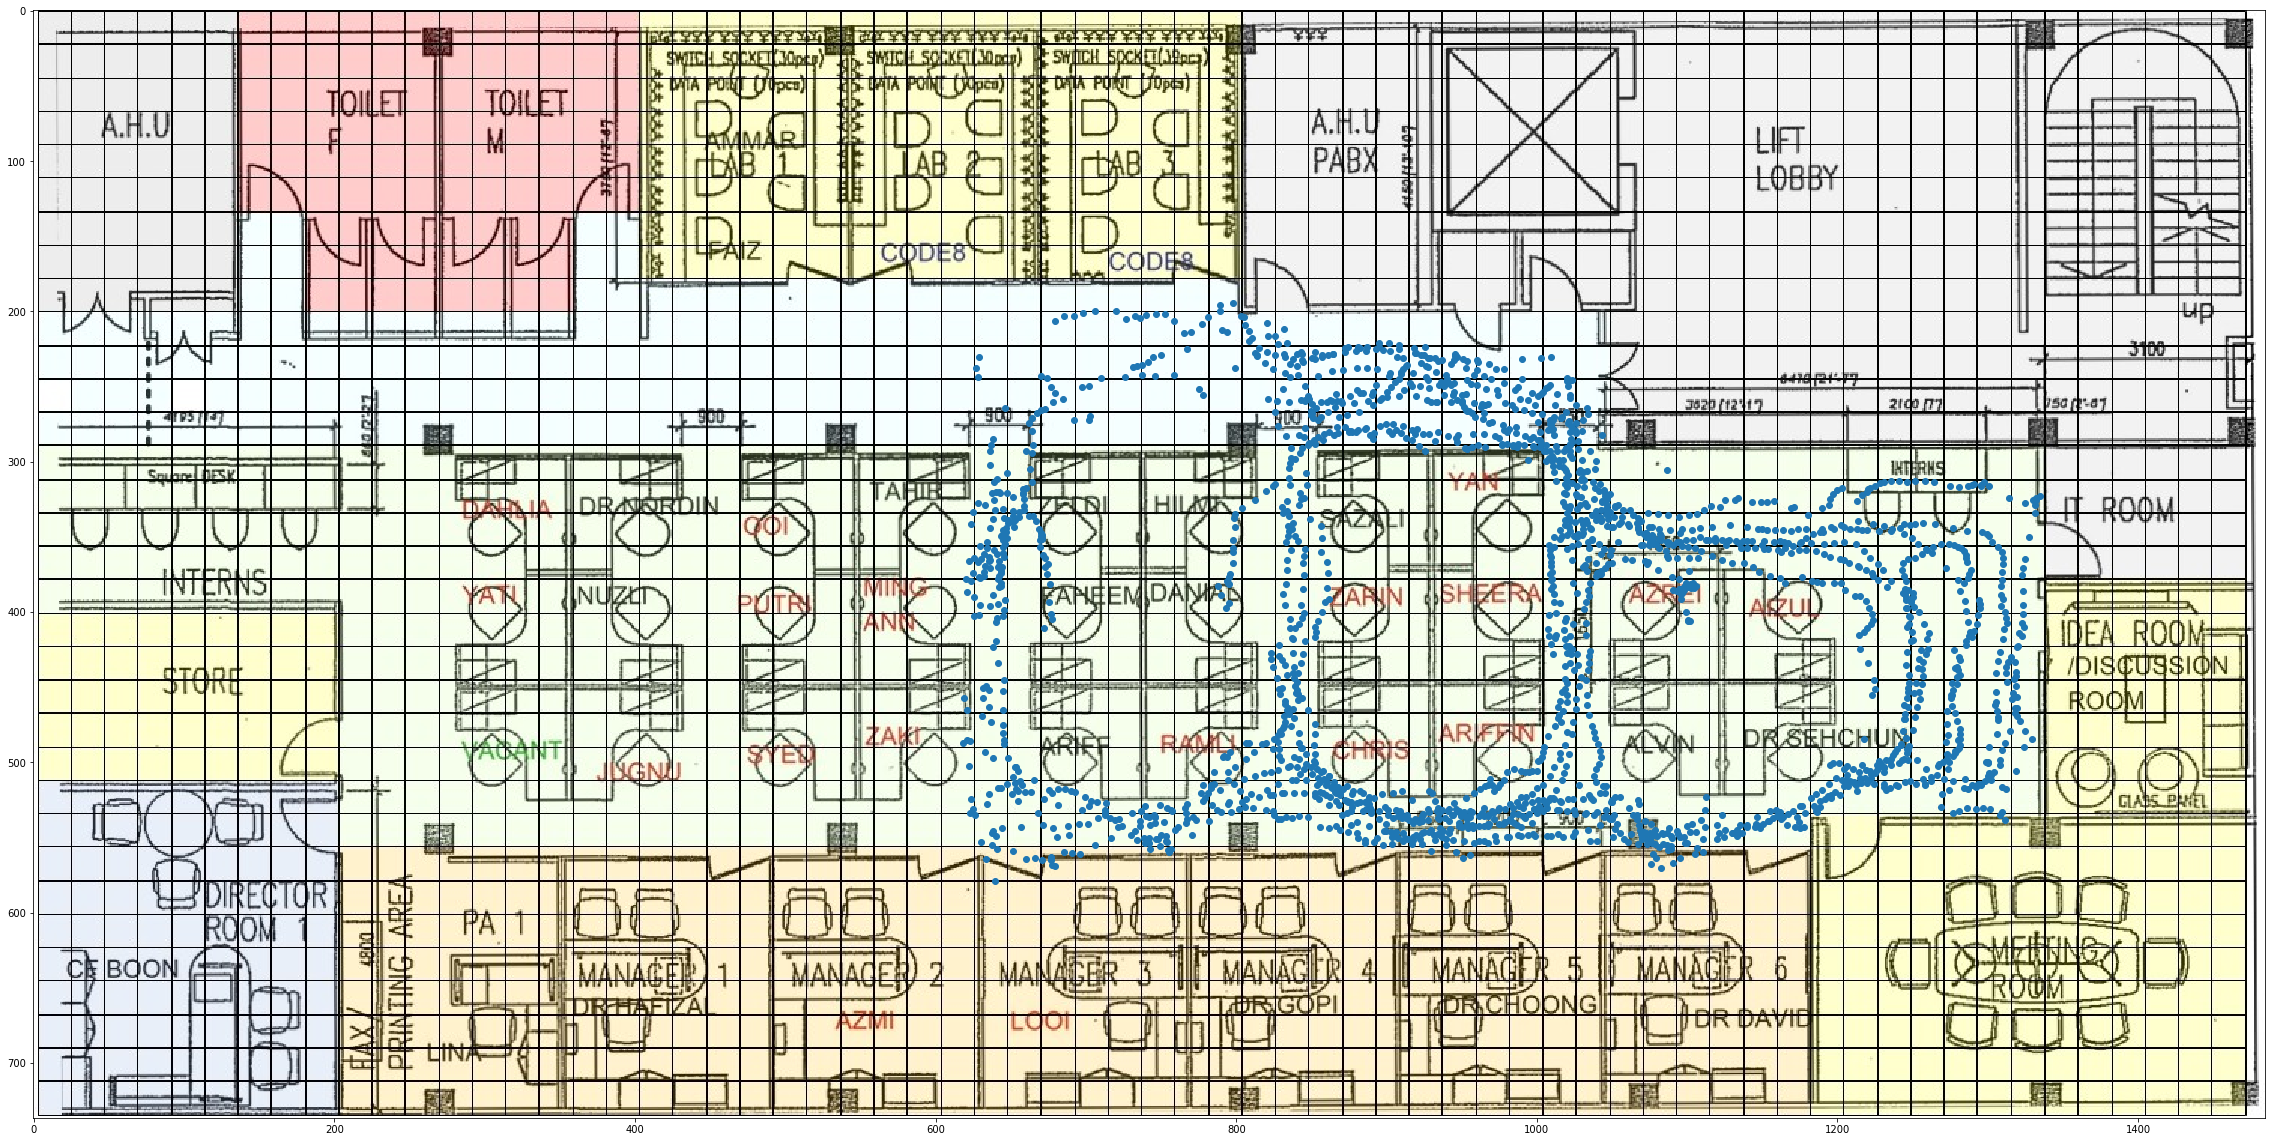

In [20]:
img =  mpimg.imread('../Map/main.png')

ori_data_loc = inv_scale(data[['X', 'Y']])
plt.figure(figsize=(40,40))
plt.imshow(img)
plt.scatter(ori_data_loc['X'] * 44, ori_data_loc['Y'] * 44)
plt.show()

In [21]:
def impute(data):
    data[scanners] = min_max_scaling(data[scanners])
    data.update(data.rolling('5s').mean())
    data.ffill(inplace=True)

In [22]:
def reg_impute(data):
    for s in scanners:
        dx = data['X'] - ble[s]['X']
        dy = data['Y'] - ble[s]['Y']
        d = np.sqrt(np.square(dy) + np.square(dx))
        reg = joblib.load('../Models/linear_distance_models_2/{}.joblib'.format(s))
        ss = pd.Series(reg.predict(d.values.reshape((-1, 1))))
        ss.index = data.index
        data[s].fillna(ss, inplace=True)

In [23]:
impute(data)
reg_impute(data)

In [24]:
data.describe()

C400A2E19293  CD4533FFC0E1  DB8B36A69C56  DD697EA75B68  DF231643E227  \
count   2209.000000   2209.000000   2209.000000   2209.000000   2209.000000   
mean       0.295463      0.432396      0.326042      0.402018      0.485303   
std        0.107748      0.099617      0.101537      0.132603      0.100616   
min        0.066667      0.150000      0.116667      0.101444     -0.069683   
25%        0.216667      0.366667      0.250000      0.300000      0.416667   
50%        0.279167      0.433333      0.316667      0.400000      0.494444   
75%        0.361111      0.493333      0.393333      0.500000      0.560417   
max        0.600000      0.744444      0.627778      0.791667      0.716667   

       E13B805C6CB0  E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  E96AF2C858BA  \
count   2209.000000   2209.000000   2209.000000   2209.000000   2209.000000   
mean       0.442852      0.243066      0.336758      0.177584      0.388380   
std        0.110334      0.088746      0.114858      0.074510      0.126303   
min        0.083333      0.066667     -0.170427      0.033333     -0.186053   
25%        0.377778      0.175000      0.255556      0.116667      0.295833   
50%        0.427778      0.233333      0.316667      0.166667      0.383333   
75%        0.506250      0.294444      0.415278      0.233333      0.480556   
max        0.722222      0.533333      0.618434      0.416667      0.670588   

       EC72840D9AD3  F1307ECB3B90  F1EDAF28E08A  F69A86823B96  FB2EE01C18CE  \
count   2209.000000   2209.000000   2209.000000   2209.000000   2209.000000   
mean       0.405425      0.431772      0.166372      0.410670      0.273277   
std        0.128498      0.125421      0.059675      0.105683      0.099612   
min        0.116667      0.116667      0.066667      0.080540     -0.186969   
25%        0.316667      0.350000      0.125000      0.330952      0.194444   
50%        0.400000      0.430556      0.150000      0.400000      0.252778   
75%        0.483333      0.516667      0.205556      0.500000      0.366667   
max        0.783333      0.750000      0.366667      0.683333      0.499074   

       FDAE5980F28C            X            Y  
count   2209.000000  2209.000000  2209.000000  
mean       0.270624     0.658823     0.548408  
std        0.118297     0.130779     0.139097  
min        0.033333     0.423566     0.273461  
25%        0.172222     0.569223     0.434050  
50%        0.250000     0.666777     0.537992  
75%        0.362500     0.752391     0.692079  
max        0.550000     0.898251     0.755278

In [25]:
def create_window(dataset, win_size, start_index=0, end_index=None):
    data = []
    labels = []

    start_index = start_index + win_size
    if end_index is None:
        end_index = len(dataset)

    for i in range(start_index, end_index):
        indices = range(i-win_size, i)
        data.append(dataset[scanners].iloc[indices].values)
        labels.append(dataset[['X', 'Y']].iloc[indices].values)
    return np.array(data), np.array(labels)

In [26]:
win_size = 50
X, y = create_window(data, win_size)

In [27]:
msk = np.random.rand(len(X)) < 0.8
X_train, y_train = X[msk], y[msk]
X_test, y_test = X[~msk], y[~msk]

In [28]:
batch_size = 32
ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds = ds.batch(batch_size)

In [29]:
ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ds_test = ds_test.batch(batch_size)

In [30]:
epochs = 50000

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=100, monitor='val_mse')
]

metrics = ['mse', 'mae']

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(16, activation='relu', return_sequences=True, input_shape=(win_size, 16)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2)
])

optimizer = tf.keras.optimizers.Adam(0.00005)
model.compile(optimizer=optimizer, loss='mse', metrics=metrics)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 16)            2112      
_________________________________________________________________
dense (Dense)                (None, 30, 128)           2176      
_________________________________________________________________
dense_1 (Dense)              (None, 30, 64)            8256      
_________________________________________________________________
dense_2 (Dense)              (None, 30, 32)            2080      
_________________________________________________________________
dense_3 (Dense)              (None, 30, 16)            528       
_________________________________________________________________
dense_4 (Dense)              (None, 30, 8)             136       
_________________________________________________________________
dense_5 (Dense)              (None, 30, 4)             3

In [32]:
history = model.fit(ds, epochs=epochs, validation_data=ds_test, callbacks=callbacks)

Epoch 1/50000
54/54 [==============================] - 2s 39ms/step - loss: 0.3830 - mse: 0.3832 - mae: 0.6015 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.3790 - mse: 0.3784 - mae: 0.5973 - val_loss: 0.3820 - val_mse: 0.3848 - val_mae: 0.6023
Epoch 3/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.3751 - mse: 0.3745 - mae: 0.5939 - val_loss: 0.3781 - val_mse: 0.3809 - val_mae: 0.5988
Epoch 4/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.3712 - mse: 0.3706 - mae: 0.5903 - val_loss: 0.3741 - val_mse: 0.3768 - val_mae: 0.5951
Epoch 5/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.3670 - mse: 0.3665 - mae: 0.5864 - val_loss: 0.3698 - val_mse: 0.3724 - val_mae: 0.5910
Epoch 6/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.3627 - mse: 0.3621 - mae: 0.5822 - val_loss: 0.3654 - val_mse: 0.3680 - val_mae: 0.58

54/54 [==============================] - 1s 10ms/step - loss: 0.1907 - mse: 0.1907 - mae: 0.3522 - val_loss: 0.1949 - val_mse: 0.1954 - val_mae: 0.3573
Epoch 51/50000
54/54 [==============================] - 1s 9ms/step - loss: 0.1882 - mse: 0.1882 - mae: 0.3492 - val_loss: 0.1924 - val_mse: 0.1929 - val_mae: 0.3543
Epoch 52/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.1857 - mse: 0.1858 - mae: 0.3463 - val_loss: 0.1900 - val_mse: 0.1904 - val_mae: 0.3514
Epoch 53/50000
54/54 [==============================] - 1s 11ms/step - loss: 0.1833 - mse: 0.1833 - mae: 0.3435 - val_loss: 0.1875 - val_mse: 0.1880 - val_mae: 0.3485
Epoch 54/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.1809 - mse: 0.1810 - mae: 0.3406 - val_loss: 0.1851 - val_mse: 0.1856 - val_mae: 0.3456
Epoch 55/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.1786 - mse: 0.1786 - mae: 0.3379 - val_loss: 0.1828 - val_mse: 0.1832 - val_mae: 0.3428
Epoch 56/50000
54

54/54 [==============================] - 0s 9ms/step - loss: 0.0980 - mse: 0.0981 - mae: 0.2413 - val_loss: 0.1016 - val_mse: 0.1016 - val_mae: 0.2452
Epoch 100/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0965 - mse: 0.0966 - mae: 0.2395 - val_loss: 0.1001 - val_mse: 0.1001 - val_mae: 0.2433
Epoch 101/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0951 - mse: 0.0952 - mae: 0.2376 - val_loss: 0.0987 - val_mse: 0.0987 - val_mae: 0.2414
Epoch 102/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0937 - mse: 0.0938 - mae: 0.2358 - val_loss: 0.0973 - val_mse: 0.0973 - val_mae: 0.2395
Epoch 103/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0923 - mse: 0.0924 - mae: 0.2339 - val_loss: 0.0958 - val_mse: 0.0958 - val_mae: 0.2377
Epoch 104/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0909 - mse: 0.0910 - mae: 0.2321 - val_loss: 0.0944 - val_mse: 0.0944 - val_mae: 0.2358
Epoch 105/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0418 - mse: 0.0419 - mae: 0.1542 - val_loss: 0.0442 - val_mse: 0.0441 - val_mae: 0.1573
Epoch 149/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0409 - mse: 0.0410 - mae: 0.1525 - val_loss: 0.0433 - val_mse: 0.0432 - val_mae: 0.1555
Epoch 150/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0401 - mse: 0.0402 - mae: 0.1507 - val_loss: 0.0424 - val_mse: 0.0423 - val_mae: 0.1538
Epoch 151/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0392 - mse: 0.0393 - mae: 0.1490 - val_loss: 0.0415 - val_mse: 0.0415 - val_mae: 0.1521
Epoch 152/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0385 - mae: 0.1472 - val_loss: 0.0407 - val_mse: 0.0406 - val_mae: 0.1503
Epoch 153/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0376 - mse: 0.0377 - mae: 0.1455 - val_loss: 0.0398 - val_mse: 0.0398 - val_mae: 0.1486
Epoch 154/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - mae: 0.0935 - val_loss: 0.0159 - val_mse: 0.0160 - val_mae: 0.0978
Epoch 198/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0929 - val_loss: 0.0156 - val_mse: 0.0157 - val_mae: 0.0971
Epoch 199/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0922 - val_loss: 0.0154 - val_mse: 0.0155 - val_mae: 0.0964
Epoch 200/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0916 - val_loss: 0.0151 - val_mse: 0.0152 - val_mae: 0.0958
Epoch 201/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0910 - val_loss: 0.0149 - val_mse: 0.0150 - val_mae: 0.0951
Epoch 202/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0904 - val_loss: 0.0146 - val_mse: 0.0148 - val_mae: 0.0945
Epoch 203/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0792 - val_loss: 0.0105 - val_mse: 0.0107 - val_mae: 0.0825
Epoch 247/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0791 - val_loss: 0.0105 - val_mse: 0.0107 - val_mae: 0.0825
Epoch 248/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0099 - mae: 0.0790 - val_loss: 0.0104 - val_mse: 0.0107 - val_mae: 0.0824
Epoch 249/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0099 - mae: 0.0789 - val_loss: 0.0104 - val_mse: 0.0107 - val_mae: 0.0823
Epoch 250/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0099 - mae: 0.0789 - val_loss: 0.0104 - val_mse: 0.0106 - val_mae: 0.0822
Epoch 251/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0099 - mae: 0.0788 - val_loss: 0.0104 - val_mse: 0.0106 - val_mae: 0.0821
Epoch 252/5000

54/54 [==============================] - 0s 7ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0770 - val_loss: 0.0099 - val_mse: 0.0102 - val_mae: 0.0801
Epoch 296/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0770 - val_loss: 0.0099 - val_mse: 0.0102 - val_mae: 0.0800
Epoch 297/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0769 - val_loss: 0.0099 - val_mse: 0.0102 - val_mae: 0.0800
Epoch 298/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0096 - mse: 0.0095 - mae: 0.0769 - val_loss: 0.0099 - val_mse: 0.0102 - val_mae: 0.0800
Epoch 299/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0096 - mse: 0.0095 - mae: 0.0769 - val_loss: 0.0099 - val_mse: 0.0102 - val_mae: 0.0799
Epoch 300/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0096 - mse: 0.0095 - mae: 0.0769 - val_loss: 0.0099 - val_mse: 0.0102 - val_mae: 0.0799
Epoch 301/5000

54/54 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0758 - val_loss: 0.0097 - val_mse: 0.0100 - val_mae: 0.0791
Epoch 345/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0093 - mae: 0.0758 - val_loss: 0.0097 - val_mse: 0.0100 - val_mae: 0.0790
Epoch 346/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0093 - mae: 0.0758 - val_loss: 0.0097 - val_mse: 0.0099 - val_mae: 0.0790
Epoch 347/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0093 - mae: 0.0758 - val_loss: 0.0097 - val_mse: 0.0099 - val_mae: 0.0790
Epoch 348/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0093 - mae: 0.0758 - val_loss: 0.0097 - val_mse: 0.0099 - val_mae: 0.0790
Epoch 349/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0093 - mae: 0.0758 - val_loss: 0.0097 - val_mse: 0.0099 - val_mae: 0.0790
Epoch 350/5000

54/54 [==============================] - 0s 7ms/step - loss: 0.0093 - mse: 0.0092 - mae: 0.0750 - val_loss: 0.0095 - val_mse: 0.0098 - val_mae: 0.0784
Epoch 394/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0749 - val_loss: 0.0095 - val_mse: 0.0098 - val_mae: 0.0784
Epoch 395/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0749 - val_loss: 0.0095 - val_mse: 0.0098 - val_mae: 0.0784
Epoch 396/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0749 - val_loss: 0.0095 - val_mse: 0.0098 - val_mae: 0.0783
Epoch 397/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0749 - val_loss: 0.0095 - val_mse: 0.0098 - val_mae: 0.0783
Epoch 398/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0749 - val_loss: 0.0095 - val_mse: 0.0098 - val_mae: 0.0783
Epoch 399/5000

54/54 [==============================] - 0s 7ms/step - loss: 0.0091 - mse: 0.0090 - mae: 0.0741 - val_loss: 0.0093 - val_mse: 0.0096 - val_mae: 0.0777
Epoch 443/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0741 - val_loss: 0.0093 - val_mse: 0.0095 - val_mae: 0.0777
Epoch 444/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0741 - val_loss: 0.0092 - val_mse: 0.0095 - val_mae: 0.0777
Epoch 445/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0090 - mse: 0.0089 - mae: 0.0741 - val_loss: 0.0092 - val_mse: 0.0095 - val_mae: 0.0777
Epoch 446/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0090 - mse: 0.0089 - mae: 0.0741 - val_loss: 0.0092 - val_mse: 0.0095 - val_mae: 0.0776
Epoch 447/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0090 - mse: 0.0089 - mae: 0.0741 - val_loss: 0.0092 - val_mse: 0.0095 - val_mae: 0.0775
Epoch 448/5000

54/54 [==============================] - 0s 7ms/step - loss: 0.0077 - mse: 0.0076 - mae: 0.0688 - val_loss: 0.0078 - val_mse: 0.0080 - val_mae: 0.0718
Epoch 492/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0686 - val_loss: 0.0077 - val_mse: 0.0080 - val_mae: 0.0715
Epoch 493/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0076 - mse: 0.0075 - mae: 0.0683 - val_loss: 0.0076 - val_mse: 0.0079 - val_mae: 0.0712
Epoch 494/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0075 - mse: 0.0074 - mae: 0.0680 - val_loss: 0.0076 - val_mse: 0.0078 - val_mae: 0.0709
Epoch 495/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0075 - mse: 0.0074 - mae: 0.0677 - val_loss: 0.0075 - val_mse: 0.0078 - val_mae: 0.0706
Epoch 496/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0074 - mse: 0.0073 - mae: 0.0674 - val_loss: 0.0074 - val_mse: 0.0077 - val_mae: 0.0702
Epoch 497/5000

54/54 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0042 - mae: 0.0497 - val_loss: 0.0042 - val_mse: 0.0044 - val_mae: 0.0507
Epoch 541/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0493 - val_loss: 0.0042 - val_mse: 0.0043 - val_mae: 0.0504
Epoch 542/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0041 - mae: 0.0490 - val_loss: 0.0041 - val_mse: 0.0043 - val_mae: 0.0500
Epoch 543/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0486 - val_loss: 0.0041 - val_mse: 0.0042 - val_mae: 0.0496
Epoch 544/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0040 - mae: 0.0483 - val_loss: 0.0040 - val_mse: 0.0042 - val_mae: 0.0493
Epoch 545/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0480 - val_loss: 0.0040 - val_mse: 0.0041 - val_mae: 0.0489
Epoch 546/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0390 - val_loss: 0.0027 - val_mse: 0.0028 - val_mae: 0.0396
Epoch 590/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0389 - val_loss: 0.0027 - val_mse: 0.0028 - val_mae: 0.0395
Epoch 591/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0027 - mse: 0.0026 - mae: 0.0388 - val_loss: 0.0026 - val_mse: 0.0028 - val_mae: 0.0394
Epoch 592/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0027 - mse: 0.0026 - mae: 0.0387 - val_loss: 0.0026 - val_mse: 0.0027 - val_mae: 0.0393
Epoch 593/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0385 - val_loss: 0.0026 - val_mse: 0.0027 - val_mae: 0.0391
Epoch 594/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0384 - val_loss: 0.0026 - val_mse: 0.0027 - val_mae: 0.0390
Epoch 595/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0021 - mae: 0.0348 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0355
Epoch 639/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0347 - val_loss: 0.0021 - val_mse: 0.0022 - val_mae: 0.0354
Epoch 640/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0346 - val_loss: 0.0021 - val_mse: 0.0022 - val_mae: 0.0353
Epoch 641/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0346 - val_loss: 0.0021 - val_mse: 0.0022 - val_mae: 0.0353
Epoch 642/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0345 - val_loss: 0.0021 - val_mse: 0.0022 - val_mae: 0.0352
Epoch 643/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0344 - val_loss: 0.0021 - val_mse: 0.0022 - val_mae: 0.0351
Epoch 644/5000

54/54 [==============================] - 0s 9ms/step - loss: 0.0019 - mse: 0.0018 - mae: 0.0319 - val_loss: 0.0019 - val_mse: 0.0020 - val_mae: 0.0331
Epoch 688/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0019 - mse: 0.0018 - mae: 0.0319 - val_loss: 0.0019 - val_mse: 0.0020 - val_mae: 0.0330
Epoch 689/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0019 - mse: 0.0018 - mae: 0.0318 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0330
Epoch 690/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0318 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0329
Epoch 691/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0318 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0329
Epoch 692/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0317 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0328
Epoch 693/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0017 - mse: 0.0016 - mae: 0.0297 - val_loss: 0.0017 - val_mse: 0.0018 - val_mae: 0.0312
Epoch 737/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0017 - mse: 0.0016 - mae: 0.0296 - val_loss: 0.0017 - val_mse: 0.0018 - val_mae: 0.0311
Epoch 738/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0311
Epoch 739/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0310
Epoch 740/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0310
Epoch 741/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0310
Epoch 742/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0279 - val_loss: 0.0015 - val_mse: 0.0016 - val_mae: 0.0296
Epoch 786/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0278 - val_loss: 0.0015 - val_mse: 0.0016 - val_mae: 0.0296
Epoch 787/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0278 - val_loss: 0.0015 - val_mse: 0.0016 - val_mae: 0.0295
Epoch 788/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0278 - val_loss: 0.0015 - val_mse: 0.0016 - val_mae: 0.0295
Epoch 789/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0277 - val_loss: 0.0015 - val_mse: 0.0016 - val_mae: 0.0295
Epoch 790/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0277 - val_loss: 0.0015 - val_mse: 0.0016 - val_mae: 0.0294
Epoch 791/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0014 - mse: 0.0013 - mae: 0.0264 - val_loss: 0.0014 - val_mse: 0.0015 - val_mae: 0.0284
Epoch 835/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0014 - mse: 0.0013 - mae: 0.0263 - val_loss: 0.0014 - val_mse: 0.0015 - val_mae: 0.0284
Epoch 836/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0263 - val_loss: 0.0014 - val_mse: 0.0015 - val_mae: 0.0283
Epoch 837/50000
54/54 [==============================] - 1s 10ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0263 - val_loss: 0.0014 - val_mse: 0.0015 - val_mae: 0.0283
Epoch 838/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0262 - val_loss: 0.0014 - val_mse: 0.0015 - val_mae: 0.0283
Epoch 839/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0262 - val_loss: 0.0014 - val_mse: 0.0015 - val_mae: 0.0282
Epoch 840/500

54/54 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0250 - val_loss: 0.0013 - val_mse: 0.0014 - val_mae: 0.0272
Epoch 884/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0250 - val_loss: 0.0013 - val_mse: 0.0014 - val_mae: 0.0272
Epoch 885/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0250 - val_loss: 0.0013 - val_mse: 0.0014 - val_mae: 0.0272
Epoch 886/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0250 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0272
Epoch 887/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0250 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0271
Epoch 888/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0249 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0271
Epoch 889/5000

54/54 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0239 - val_loss: 0.0012 - val_mse: 0.0013 - val_mae: 0.0263
Epoch 933/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0239 - val_loss: 0.0012 - val_mse: 0.0013 - val_mae: 0.0262
Epoch 934/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0239 - val_loss: 0.0012 - val_mse: 0.0013 - val_mae: 0.0262
Epoch 935/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0239 - val_loss: 0.0012 - val_mse: 0.0013 - val_mae: 0.0262
Epoch 936/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0238 - val_loss: 0.0012 - val_mse: 0.0013 - val_mae: 0.0262
Epoch 937/50000
54/54 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0238 - val_loss: 0.0012 - val_mse: 0.0013 - val_mae: 0.0262
Epoch 938/5000

54/54 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0010 - mae: 0.0229 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0253
Epoch 982/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0010 - mae: 0.0229 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0253
Epoch 983/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0010 - mae: 0.0229 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0252
Epoch 984/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0010 - mae: 0.0229 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0252
Epoch 985/50000
54/54 [==============================] - 0s 8ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0229 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0252
Epoch 986/50000
54/54 [==============================] - 0s 9ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0228 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0252
Epoch 987/5000

54/54 [==============================] - 0s 7ms/step - loss: 9.8011e-04 - mse: 9.7297e-04 - mae: 0.0220 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0244
Epoch 1030/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.7866e-04 - mse: 9.7153e-04 - mae: 0.0220 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0244
Epoch 1031/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.7723e-04 - mse: 9.7012e-04 - mae: 0.0220 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0243
Epoch 1032/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.7582e-04 - mse: 9.6872e-04 - mae: 0.0220 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0243
Epoch 1033/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.7439e-04 - mse: 9.6730e-04 - mae: 0.0220 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0243
Epoch 1034/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.7299e-04 - mse: 9.6591e-04 - mae: 0.0219 - val_loss: 0.00

54/54 [==============================] - 0s 7ms/step - loss: 9.1950e-04 - mse: 9.1295e-04 - mae: 0.0213 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0238
Epoch 1076/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.1827e-04 - mse: 9.1172e-04 - mae: 0.0212 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0238
Epoch 1077/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.1698e-04 - mse: 9.1044e-04 - mae: 0.0212 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0238
Epoch 1078/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.1566e-04 - mse: 9.0913e-04 - mae: 0.0212 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0238
Epoch 1079/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.1439e-04 - mse: 9.0787e-04 - mae: 0.0212 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0238
Epoch 1080/50000
54/54 [==============================] - 0s 7ms/step - loss: 9.1317e-04 - mse: 9.0665e-04 - mae: 0.0212 - val_loss: 0.00

Epoch 1121/50000
54/54 [==============================] - 1s 10ms/step - loss: 8.6292e-04 - mse: 8.5681e-04 - mae: 0.0205 - val_loss: 9.6841e-04 - val_mse: 0.0010 - val_mae: 0.0233
Epoch 1122/50000
54/54 [==============================] - 1s 10ms/step - loss: 8.6178e-04 - mse: 8.5567e-04 - mae: 0.0205 - val_loss: 9.6761e-04 - val_mse: 0.0010 - val_mae: 0.0233
Epoch 1123/50000
54/54 [==============================] - 1s 10ms/step - loss: 8.6072e-04 - mse: 8.5461e-04 - mae: 0.0205 - val_loss: 9.6671e-04 - val_mse: 0.0010 - val_mae: 0.0232
Epoch 1124/50000
54/54 [==============================] - 1s 10ms/step - loss: 8.5958e-04 - mse: 8.5348e-04 - mae: 0.0205 - val_loss: 9.6565e-04 - val_mse: 9.9900e-04 - val_mae: 0.0232
Epoch 1125/50000
54/54 [==============================] - 1s 10ms/step - loss: 8.5841e-04 - mse: 8.5232e-04 - mae: 0.0205 - val_loss: 9.6459e-04 - val_mse: 9.9790e-04 - val_mae: 0.0232
Epoch 1126/50000
54/54 [==============================] - 0s 8ms/step - loss: 8.5720e-0

54/54 [==============================] - 0s 7ms/step - loss: 8.1482e-04 - mse: 8.0897e-04 - mae: 0.0199 - val_loss: 9.2839e-04 - val_mse: 9.6085e-04 - val_mae: 0.0228
Epoch 1166/50000
54/54 [==============================] - 0s 7ms/step - loss: 8.1380e-04 - mse: 8.0796e-04 - mae: 0.0198 - val_loss: 9.2744e-04 - val_mse: 9.5988e-04 - val_mae: 0.0228
Epoch 1167/50000
54/54 [==============================] - 0s 7ms/step - loss: 8.1275e-04 - mse: 8.0691e-04 - mae: 0.0198 - val_loss: 9.2640e-04 - val_mse: 9.5879e-04 - val_mae: 0.0228
Epoch 1168/50000
54/54 [==============================] - 0s 7ms/step - loss: 8.1174e-04 - mse: 8.0591e-04 - mae: 0.0198 - val_loss: 9.2552e-04 - val_mse: 9.5789e-04 - val_mae: 0.0228
Epoch 1169/50000
54/54 [==============================] - 0s 7ms/step - loss: 8.1072e-04 - mse: 8.0490e-04 - mae: 0.0198 - val_loss: 9.2452e-04 - val_mse: 9.5685e-04 - val_mae: 0.0228
Epoch 1170/50000
54/54 [==============================] - 0s 9ms/step - loss: 8.0965e-04 - mse: 8

54/54 [==============================] - 0s 7ms/step - loss: 7.7154e-04 - mse: 7.6598e-04 - mae: 0.0193 - val_loss: 8.8600e-04 - val_mse: 9.1713e-04 - val_mae: 0.0223
Epoch 1210/50000
54/54 [==============================] - 0s 7ms/step - loss: 7.7066e-04 - mse: 7.6511e-04 - mae: 0.0193 - val_loss: 8.8483e-04 - val_mse: 9.1591e-04 - val_mae: 0.0223
Epoch 1211/50000
54/54 [==============================] - 0s 8ms/step - loss: 7.6964e-04 - mse: 7.6410e-04 - mae: 0.0192 - val_loss: 8.8366e-04 - val_mse: 9.1468e-04 - val_mae: 0.0223
Epoch 1212/50000
54/54 [==============================] - 0s 7ms/step - loss: 7.6861e-04 - mse: 7.6308e-04 - mae: 0.0192 - val_loss: 8.8260e-04 - val_mse: 9.1356e-04 - val_mae: 0.0223
Epoch 1213/50000
54/54 [==============================] - 0s 7ms/step - loss: 7.6764e-04 - mse: 7.6212e-04 - mae: 0.0192 - val_loss: 8.8155e-04 - val_mse: 9.1248e-04 - val_mae: 0.0222
Epoch 1214/50000
54/54 [==============================] - 0s 7ms/step - loss: 7.6666e-04 - mse: 7

54/54 [==============================] - 0s 8ms/step - loss: 7.3255e-04 - mse: 7.2734e-04 - mae: 0.0187 - val_loss: 8.4008e-04 - val_mse: 8.6936e-04 - val_mae: 0.0217
Epoch 1254/50000
54/54 [==============================] - 0s 8ms/step - loss: 7.3180e-04 - mse: 7.2659e-04 - mae: 0.0187 - val_loss: 8.3906e-04 - val_mse: 8.6833e-04 - val_mae: 0.0217
Epoch 1255/50000
54/54 [==============================] - 0s 8ms/step - loss: 7.3104e-04 - mse: 7.2584e-04 - mae: 0.0187 - val_loss: 8.3802e-04 - val_mse: 8.6725e-04 - val_mae: 0.0217
Epoch 1256/50000
54/54 [==============================] - 0s 9ms/step - loss: 7.3027e-04 - mse: 7.2507e-04 - mae: 0.0187 - val_loss: 8.3698e-04 - val_mse: 8.6617e-04 - val_mae: 0.0217
Epoch 1257/50000
54/54 [==============================] - 0s 8ms/step - loss: 7.2950e-04 - mse: 7.2431e-04 - mae: 0.0187 - val_loss: 8.3613e-04 - val_mse: 8.6529e-04 - val_mae: 0.0217
Epoch 1258/50000
54/54 [==============================] - 0s 9ms/step - loss: 7.2878e-04 - mse: 7

54/54 [==============================] - 0s 8ms/step - loss: 6.9944e-04 - mse: 6.9445e-04 - mae: 0.0183 - val_loss: 7.9584e-04 - val_mse: 8.2352e-04 - val_mae: 0.0211
Epoch 1298/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.9878e-04 - mse: 6.9385e-04 - mae: 0.0183 - val_loss: 7.9550e-04 - val_mse: 8.2302e-04 - val_mae: 0.0211
Epoch 1299/50000
54/54 [==============================] - 0s 9ms/step - loss: 6.9758e-04 - mse: 6.9274e-04 - mae: 0.0183 - val_loss: 7.9538e-04 - val_mse: 8.2267e-04 - val_mae: 0.0211
Epoch 1300/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.9613e-04 - mse: 6.9140e-04 - mae: 0.0183 - val_loss: 7.9484e-04 - val_mse: 8.2182e-04 - val_mae: 0.0211
Epoch 1301/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.9464e-04 - mse: 6.9000e-04 - mae: 0.0182 - val_loss: 7.9492e-04 - val_mse: 8.2171e-04 - val_mae: 0.0212
Epoch 1302/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.9320e-04 - mse: 6

54/54 [==============================] - 0s 8ms/step - loss: 6.6817e-04 - mse: 6.6385e-04 - mae: 0.0179 - val_loss: 7.5974e-04 - val_mse: 7.8603e-04 - val_mae: 0.0206
Epoch 1342/50000
54/54 [==============================] - 0s 9ms/step - loss: 6.7261e-04 - mse: 6.6813e-04 - mae: 0.0180 - val_loss: 7.6953e-04 - val_mse: 7.9656e-04 - val_mae: 0.0207
Epoch 1343/50000
54/54 [==============================] - 0s 9ms/step - loss: 6.7784e-04 - mse: 6.7313e-04 - mae: 0.0181 - val_loss: 7.7102e-04 - val_mse: 7.9821e-04 - val_mae: 0.0207
Epoch 1344/50000
54/54 [==============================] - 0s 9ms/step - loss: 6.7838e-04 - mse: 6.7364e-04 - mae: 0.0181 - val_loss: 7.6478e-04 - val_mse: 7.9137e-04 - val_mae: 0.0207
Epoch 1345/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.7492e-04 - mse: 6.7045e-04 - mae: 0.0180 - val_loss: 7.6199e-04 - val_mse: 7.8757e-04 - val_mae: 0.0207
Epoch 1346/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.7120e-04 - mse: 6

54/54 [==============================] - 0s 8ms/step - loss: 6.4402e-04 - mse: 6.3990e-04 - mae: 0.0176 - val_loss: 7.5197e-04 - val_mse: 7.7826e-04 - val_mae: 0.0205
Epoch 1386/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.4940e-04 - mse: 6.4510e-04 - mae: 0.0177 - val_loss: 7.6073e-04 - val_mse: 7.8757e-04 - val_mae: 0.0206
Epoch 1387/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.5252e-04 - mse: 6.4806e-04 - mae: 0.0177 - val_loss: 7.5418e-04 - val_mse: 7.8060e-04 - val_mae: 0.0205
Epoch 1388/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.4995e-04 - mse: 6.4561e-04 - mae: 0.0177 - val_loss: 7.4098e-04 - val_mse: 7.6617e-04 - val_mae: 0.0203
Epoch 1389/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.4583e-04 - mse: 6.4196e-04 - mae: 0.0176 - val_loss: 7.3217e-04 - val_mse: 7.5561e-04 - val_mae: 0.0202
Epoch 1390/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.4388e-04 - mse: 6

54/54 [==============================] - 0s 8ms/step - loss: 6.2281e-04 - mse: 6.1933e-04 - mae: 0.0172 - val_loss: 8.1866e-04 - val_mse: 8.4776e-04 - val_mae: 0.0214
Epoch 1430/50000
54/54 [==============================] - 0s 9ms/step - loss: 6.2891e-04 - mse: 6.2525e-04 - mae: 0.0173 - val_loss: 8.4647e-04 - val_mse: 8.7700e-04 - val_mae: 0.0218
Epoch 1431/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.3456e-04 - mse: 6.3064e-04 - mae: 0.0174 - val_loss: 8.4915e-04 - val_mse: 8.7993e-04 - val_mae: 0.0218
Epoch 1432/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.3512e-04 - mse: 6.3098e-04 - mae: 0.0174 - val_loss: 8.2470e-04 - val_mse: 8.5436e-04 - val_mae: 0.0214
Epoch 1433/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.2985e-04 - mse: 6.2582e-04 - mae: 0.0173 - val_loss: 7.8290e-04 - val_mse: 8.1005e-04 - val_mae: 0.0208
Epoch 1434/50000
54/54 [==============================] - 0s 9ms/step - loss: 6.2460e-04 - mse: 6

Epoch 1474/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.3197e-04 - mse: 6.2835e-04 - mae: 0.0174 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0252
Epoch 1475/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.3314e-04 - mse: 6.2938e-04 - mae: 0.0174 - val_loss: 0.0011 - val_mse: 0.0012 - val_mae: 0.0252
Epoch 1476/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.3262e-04 - mse: 6.2875e-04 - mae: 0.0174 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0249
Epoch 1477/50000
54/54 [==============================] - 0s 9ms/step - loss: 6.3065e-04 - mse: 6.2676e-04 - mae: 0.0173 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0245
Epoch 1478/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.2865e-04 - mse: 6.2484e-04 - mae: 0.0173 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0242
Epoch 1479/50000
54/54 [==============================] - 0s 8ms/step - loss: 6.2818e-04 - mse: 6.2444e-04 - mae: 0.0173

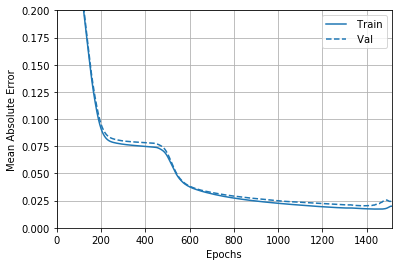

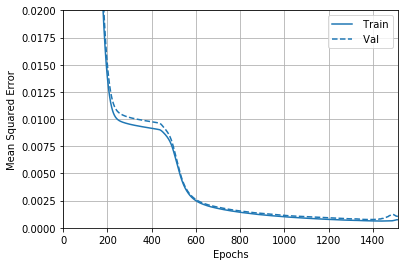

In [33]:
plt.figure()
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({"": history}, metric = "mae")
plt.ylim([0, 0.2])
plt.ylabel('Mean Absolute Error')

plt.figure()
plotter.plot({"": history}, metric = "mse")
plt.ylim([0, 0.02])
plt.ylabel('Mean Squared Error')

plt.show()

In [34]:
def _average_distance_error(preds, y_test):
    ori_preds = np.copy(preds)
    ori_preds[:, :, 0] = ori_preds[:, :, 0] * 33.5
    ori_preds[:, :, 1] = ori_preds[:, :, 1] * 16.8
    ori_y_test = np.copy(y_test)
    ori_y_test[:, :, 0] = ori_y_test[:, :, 0] * 33.5
    ori_y_test[:, :, 1] = ori_y_test[:, :, 1] * 16.8
    return np.mean(np.sqrt(np.sum(np.square(ori_preds - ori_y_test), axis=2)))

458/1 - 0s - loss: 6.5139e-04 - mse: 9.9830e-04 - mae: 0.0239
Test loss: 0.00099829522619333
Mean absolute error: 0.0009982953
Mean squared error: 0.023864005
Average distance error: 0.9020694461945505


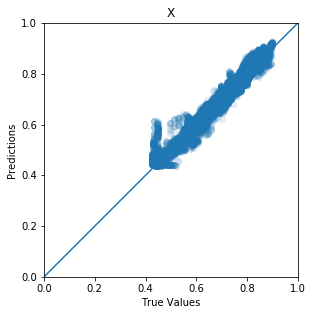

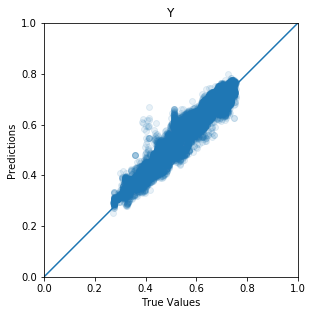

In [35]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Mean absolute error:", test_scores[1])
print("Mean squared error:", test_scores[2])

preds = model.predict(X_test)
print("Average distance error:", _average_distance_error(preds, y_test))

fig = plt.figure(figsize=(10, 20))
lims = [0, 1]
ax1 = fig.add_subplot(121, aspect='equal', title='X', xlim=lims, ylim=lims, xlabel='True Values', ylabel='Predictions')
ax1.scatter(y_test[:, :, 0], preds[:, :, 0], alpha=0.1)
ax1.plot(lims, lims)

fig = plt.figure(figsize=(10, 20))
lims = [0, 1]
ax1 = fig.add_subplot(121, aspect='equal', title='Y', xlim=lims, ylim=lims, xlabel='True Values', ylabel='Predictions')

ax1.scatter(y_test[:, :, 1], preds[:, :, 1], alpha=0.1)
ax1.plot(lims, lims)

plt.show()

In [36]:
model.save("../Models/LSTM_W50.h5")